In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
def load_data(pathfile):
    df = pd.read_csv(pathfile)
    df_ISPU = df[['tanggal', 'stasiun', 'pm10', 'so2', 'co', 'o3', 'no2','categori']]
    # Assuming 'df' is your original DataFrame

    # First, convert 'tanggal' to datetime
    df_ISPU['tanggal'] = pd.to_datetime(df['tanggal'])

    # Then, convert the columns to numeric, replacing invalid values with NaN
    df_ISPU['pm10'] = pd.to_numeric(df['pm10'], errors='coerce')
    df_ISPU['so2'] = pd.to_numeric(df['so2'], errors='coerce')
    df_ISPU['co'] = pd.to_numeric(df['co'], errors='coerce')
    df_ISPU['o3'] = pd.to_numeric(df['o3'], errors='coerce')
    df_ISPU['no2'] = pd.to_numeric(df['no2'], errors='coerce')
    
    
    #select where categori is SEDANG, BAIK, TIDAK SEHAT, SANGAT TIDAK SEHAT, BERBAHAYA

    df_ISPU = df_ISPU[df_ISPU['categori'].isin(['SEDANG', 'BAIK', 'TIDAK SEHAT', 'SANGAT TIDAK SEHAT', 'BERBAHAYA'])]

    print(df_ISPU.head())

    #rename SANGAT TIDAK SEHAT and BERBAHAYA to TIDAK SEHAT

    df_ISPU['categori'] = df_ISPU['categori'].replace(['SANGAT TIDAK SEHAT', 'BERBAHAYA'], 'TIDAK SEHAT')
    return df_ISPU

In [132]:
filepath='/Users/rianrachmanto/pypro/project/Jakarta-Air-Quality-Prediction/data/raw/merged_data.csv'
df_ispu=load_data(filepath)

     tanggal             stasiun  pm10  so2    co    o3   no2 categori
0 2010-01-01  DKI1 (Bunderan HI)  60.0  4.0  73.0  27.0  14.0   SEDANG
1 2010-01-02  DKI1 (Bunderan HI)  32.0  2.0  16.0  33.0   9.0     BAIK
2 2010-01-03  DKI1 (Bunderan HI)  27.0  2.0  19.0  20.0   9.0     BAIK
3 2010-01-04  DKI1 (Bunderan HI)  22.0  2.0  16.0  15.0   6.0     BAIK
4 2010-01-05  DKI1 (Bunderan HI)  25.0  2.0  17.0  15.0   8.0     BAIK


In [133]:
def data_checking(df_ispu):
    print(df_ispu.shape)
    print(df_ispu.info())
    print(df_ispu.describe())
    print(df_ispu.isnull().sum())
    
    #plot boxplot
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    sns.boxplot(data=df_ispu, x='pm10', ax=axes[0])
    sns.boxplot(data=df_ispu, x='so2', ax=axes[0])
    sns.boxplot(data=df_ispu, x='co', ax=axes[1])
    sns.boxplot(data=df_ispu, x='o3', ax=axes[0])
    sns.boxplot(data=df_ispu, x='no2', ax=axes[1])
    plt.show()

    return df_ispu

(18105, 8)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18105 entries, 0 to 21521
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   tanggal   18105 non-null  datetime64[ns]
 1   stasiun   18034 non-null  object        
 2   pm10      17352 non-null  float64       
 3   so2       17569 non-null  float64       
 4   co        17744 non-null  float64       
 5   o3        17512 non-null  float64       
 6   no2       17615 non-null  float64       
 7   categori  18105 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 1.2+ MB
None
               pm10           so2            co            o3           no2
count  17352.000000  17569.000000  17744.000000  17512.000000  17615.000000
mean      52.736111     17.839604     21.641625     65.080973     12.780698
std       19.443753     12.454466     13.930844     37.248320     10.846974
min        2.000000      0.000000      0.

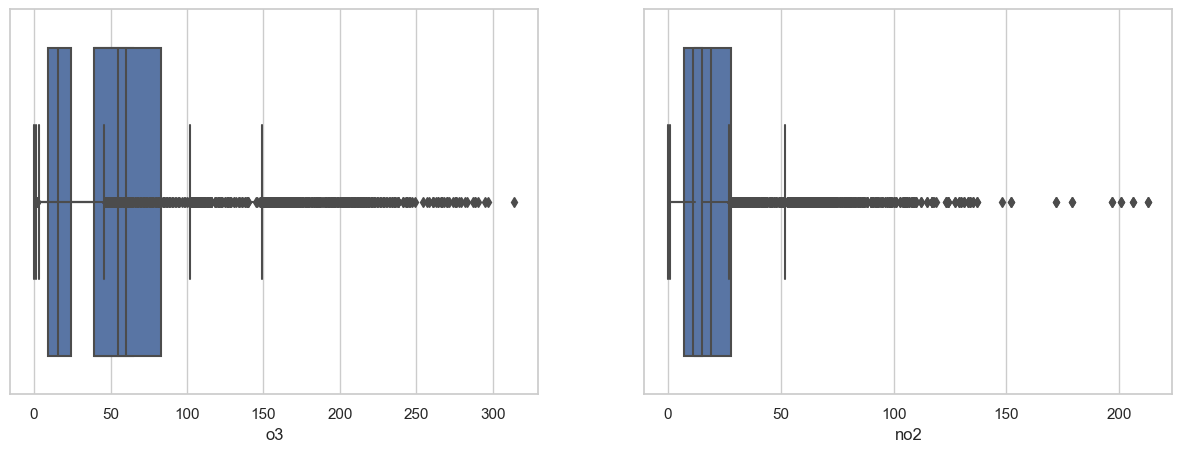

,tanggal,stasiun,pm10,so2,co,o3,no2,categori
0,2010-01-01,DKI1 (Bunderan HI),60.0,4.0,73.0,27.0,14.0,SEDANG
1,2010-01-02,DKI1 (Bunderan HI),32.0,2.0,16.0,33.0,9.0,BAIK
2,2010-01-03,DKI1 (Bunderan HI),27.0,2.0,19.0,20.0,9.0,BAIK
3,2010-01-04,DKI1 (Bunderan HI),22.0,2.0,16.0,15.0,6.0,BAIK
4,2010-01-05,DKI1 (Bunderan HI),25.0,2.0,17.0,15.0,8.0,BAIK
...,...,...,...,...,...,...,...,...
21517,2021-11-26,DKI5 (Kebon Jeruk) Jakarta Barat,32.0,16.0,7.0,15.0,20.0,SEDANG
21518,2021-11-27,DKI5 (Kebon Jeruk) Jakarta Barat,22.0,13.0,7.0,18.0,22.0,BAIK
21519,2021-11-28,DKI5 (Kebon Jeruk) Jakarta Barat,18.0,12.0,2.0,16.0,8.0,BAIK
21520,2021-11-29,DKI5 (Kebon Jeruk) Jakarta Barat,15.0,13.0,3.0,13.0,9.0,BAIK


In [134]:
data_checking(df_ispu)

In [135]:
#import simpleimputer
from sklearn.impute import SimpleImputer
#import forest isolation
from sklearn.ensemble import IsolationForest

def eda(df_ispu):
    #fill mising values of stasiun with "unknown"
    df_ispu['stasiun'].fillna('unknown', inplace=True)
    

    #impute all numerical columns with mean
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
    imp_mean.fit(df_ispu[['pm10', 'so2', 'co', 'o3', 'no2']])
    df_ispu[['pm10', 'so2', 'co', 'o3', 'no2']] = imp_mean.transform(df_ispu[['pm10', 'so2', 'co', 'o3', 'no2']])

    #remove outliers usong isolation forest
    clf = IsolationForest(random_state=0).fit(df_ispu[['pm10', 'so2', 'co', 'o3', 'no2']])
    df_ispu['outlier'] = clf.predict(df_ispu[['pm10', 'so2', 'co', 'o3', 'no2']])
    df_ispu = df_ispu[df_ispu['outlier'] != -1]
    df_ispu.drop('outlier', axis=1, inplace=True)

    

    print(df_ispu.isnull().sum())

    return df_ispu

In [136]:
eda(df_ispu)

tanggal     0
stasiun     0
pm10        0
so2         0
co          0
o3          0
no2         0
categori    0
dtype: int64


,tanggal,stasiun,pm10,so2,co,o3,no2,categori
1,2010-01-02,DKI1 (Bunderan HI),32.0,2.0,16.0,33.0,9.0,BAIK
2,2010-01-03,DKI1 (Bunderan HI),27.0,2.0,19.0,20.0,9.0,BAIK
3,2010-01-04,DKI1 (Bunderan HI),22.0,2.0,16.0,15.0,6.0,BAIK
4,2010-01-05,DKI1 (Bunderan HI),25.0,2.0,17.0,15.0,8.0,BAIK
5,2010-01-06,DKI1 (Bunderan HI),30.0,3.0,22.0,19.0,11.0,BAIK
...,...,...,...,...,...,...,...,...
21517,2021-11-26,DKI5 (Kebon Jeruk) Jakarta Barat,32.0,16.0,7.0,15.0,20.0,SEDANG
21518,2021-11-27,DKI5 (Kebon Jeruk) Jakarta Barat,22.0,13.0,7.0,18.0,22.0,BAIK
21519,2021-11-28,DKI5 (Kebon Jeruk) Jakarta Barat,18.0,12.0,2.0,16.0,8.0,BAIK
21520,2021-11-29,DKI5 (Kebon Jeruk) Jakarta Barat,15.0,13.0,3.0,13.0,9.0,BAIK


In [137]:
def featuring(df_ispu):
    # group by date and aggregate by mean
    df_grouped = df_ispu.groupby('tanggal')[['pm10', 'so2', 'co', 'o3', 'no2']].mean().reset_index()
    print(df_grouped.head())

    #plot time series for all features into 5 subplots
    fig, axes = plt.subplots(5, 1, figsize=(15, 15))
    axes[0].plot(df_grouped['tanggal'], df_grouped['pm10'])
    axes[0].set_title('pm10')
    axes[1].plot(df_grouped['tanggal'], df_grouped['so2'])
    axes[1].set_title('so2')
    axes[2].plot(df_grouped['tanggal'], df_grouped['co'])
    axes[2].set_title('co')
    axes[3].plot(df_grouped['tanggal'], df_grouped['o3'])
    axes[3].set_title('o3')
    axes[4].plot(df_grouped['tanggal'], df_grouped['no2'])
    axes[4].set_title('no2')
    plt.tight_layout()
    plt.show()
    print("last date:", df_grouped.tail())
    return df_grouped





     tanggal  pm10  so2    co    o3   no2
0 2010-01-01  60.0  4.0  73.0  27.0  14.0
1 2010-01-02  32.0  2.0  16.0  33.0   9.0
2 2010-01-03  27.0  2.0  19.0  20.0   9.0
3 2010-01-04  22.0  2.0  16.0  15.0   6.0
4 2010-01-05  25.0  2.0  17.0  15.0   8.0


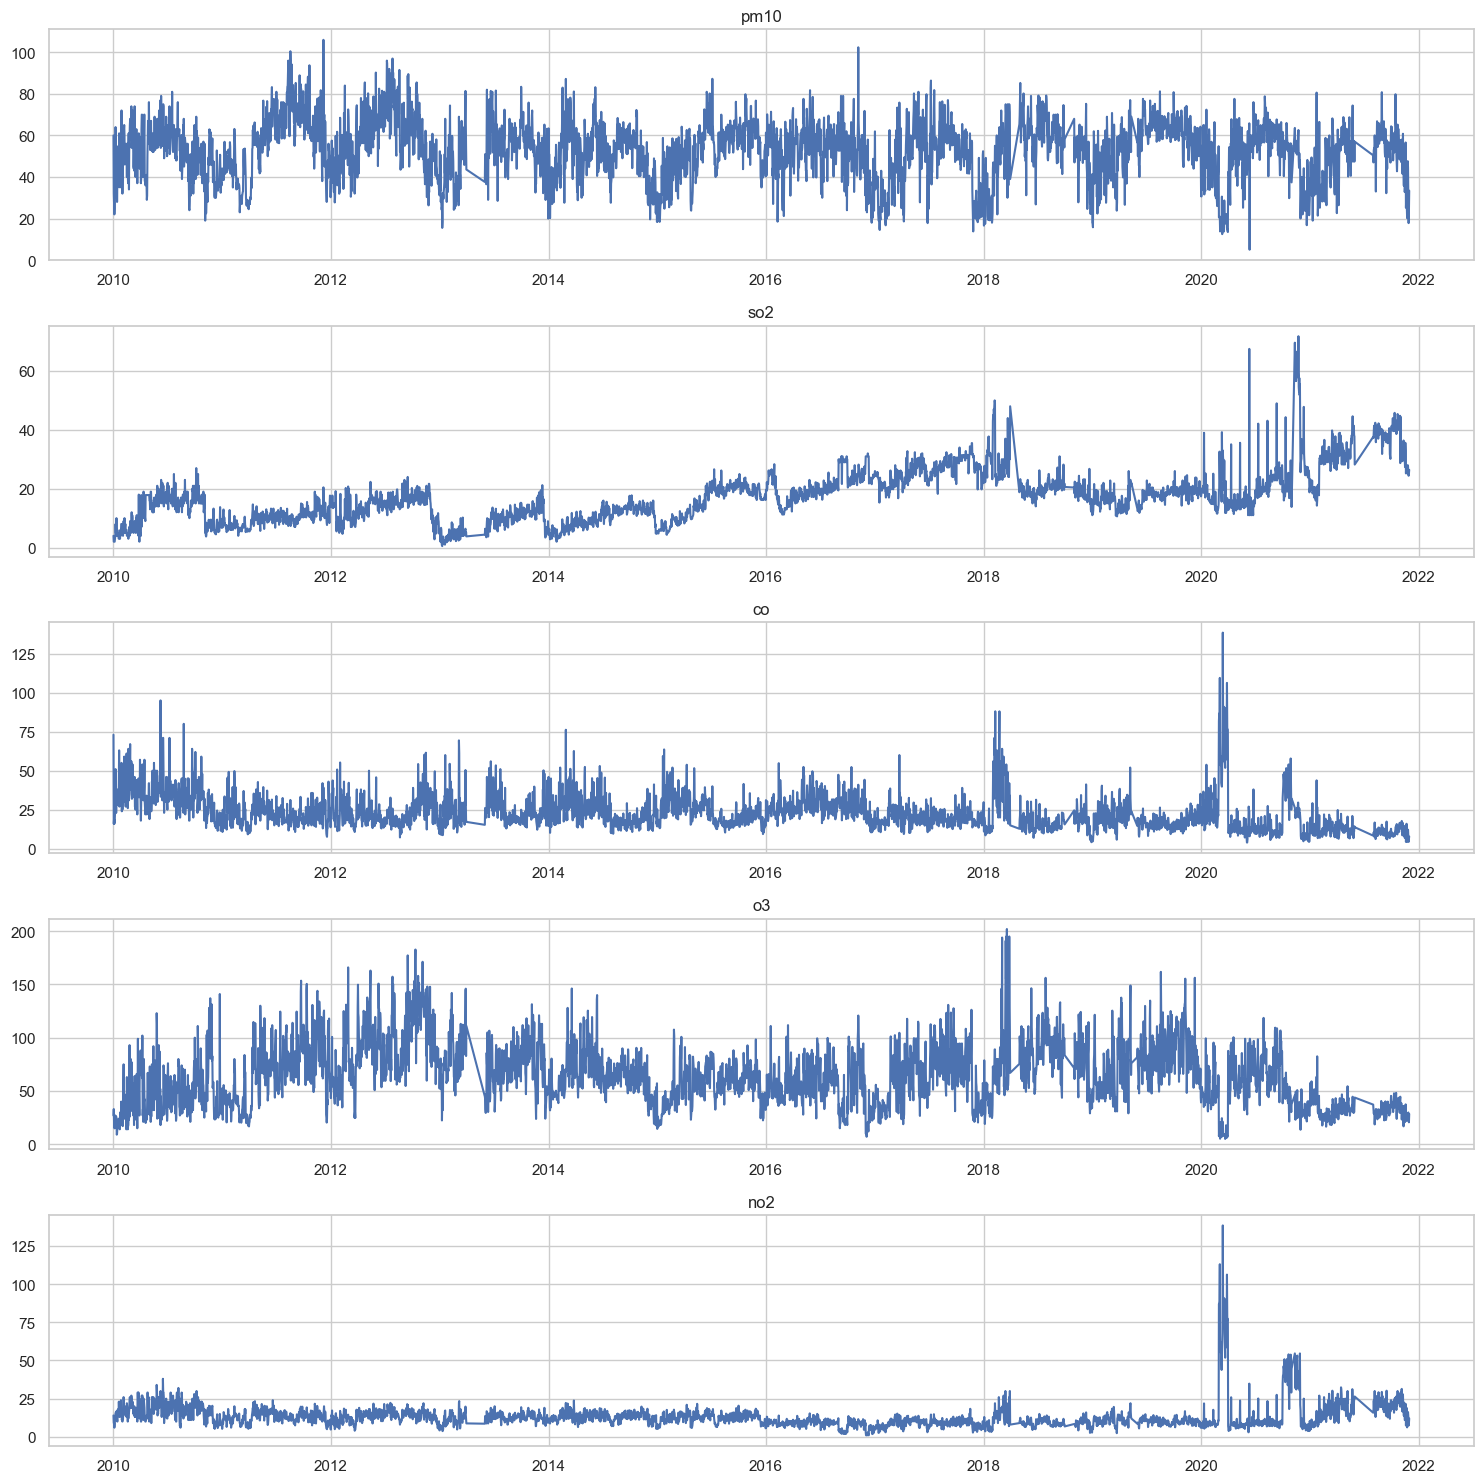

last date:         tanggal  pm10   so2    co         o3   no2
4128 2021-11-26  44.6  27.6  12.2  29.016195  16.2
4129 2021-11-27  30.8  25.6   8.2  29.816195  13.4
4130 2021-11-28  17.8  24.4   4.4  25.800000   7.4
4131 2021-11-29  23.6  25.2   6.6  20.600000   9.0
4132 2021-11-30  33.4  26.4   7.8  28.400000  12.0


In [138]:
df_grouped=featuring(df_ispu)

In [139]:
df_lstm=df_grouped[['pm10','so2','co','o3','no2']]
df_lstm

,pm10,so2,co,o3,no2
0,60.0,4.0,73.0,27.000000,14.0
1,32.0,2.0,16.0,33.000000,9.0
2,27.0,2.0,19.0,20.000000,9.0
3,22.0,2.0,16.0,15.000000,6.0
4,25.0,2.0,17.0,15.000000,8.0
...,...,...,...,...,...
4128,44.6,27.6,12.2,29.016195,16.2
4129,30.8,25.6,8.2,29.816195,13.4
4130,17.8,24.4,4.4,25.800000,7.4
4131,23.6,25.2,6.6,20.600000,9.0


In [140]:
df_pm10=df_grouped[['tanggal','pm10']]
df_pm10

,tanggal,pm10
0,2010-01-01,60.0
1,2010-01-02,32.0
2,2010-01-03,27.0
3,2010-01-04,22.0
4,2010-01-05,25.0
...,...,...
4128,2021-11-26,44.6
4129,2021-11-27,30.8
4130,2021-11-28,17.8
4131,2021-11-29,23.6


In [141]:
train_size = int(len(df_pm10) * 0.6)
train, test = df_pm10[:train_size], df_pm10[train_size:]

In [142]:
train.shape, test.shape

((2479, 2), (1654, 2))

In [143]:
from statsmodels.tsa.stattools import adfuller

In [144]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")


In [145]:
from statsmodels.tsa.arima_model import ARIMA

In [146]:
import pandas as pd
import statsmodels.api as sm

# Assuming df_pm10 is your pandas DataFrame with the 'pm10' column

p,d,q = 5,0,0
model = sm.tsa.ARIMA(df_pm10['pm10'], order=(p, d, q))
model_fit = model.fit()

# Now you can use model_fit for further analysis or predictions


In [147]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   pm10   No. Observations:                 4133
Model:                 ARIMA(5, 0, 0)   Log Likelihood              -15025.506
Date:                Fri, 11 Aug 2023   AIC                          30065.012
Time:                        10:57:48   BIC                          30109.299
Sample:                             0   HQIC                         30080.685
                               - 4133                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.8516      1.002     52.723      0.000      50.887      54.816
ar.L1          0.5045      0.014     35.680      0.000       0.477       0.532
ar.L2          0.0982      0.016      6.003      0.0

In [148]:
import pandas as pd
import statsmodels.api as sm

# Assuming df_pm10 is your pandas DataFrame with the 'pm10' column

p, d, q = 5, 0, 0
model = sm.tsa.ARIMA(df_pm10['pm10'], order=(p, d, q))
model_fit = model.fit()

# Forecasting future values
forecast_steps = 10  # Number of steps to forecast into the future
forecast = model_fit.forecast(steps=forecast_steps)

# Printing the forecasted values
print("Forecasted values:", forecast)


Forecasted values: 4133    34.909224
4134    35.195682
4135    35.024360
4136    36.089788
4137    37.909177
4138    39.110350
4139    40.039054
4140    40.821076
4141    41.610926
4142    42.441591
Name: predicted_mean, dtype: float64


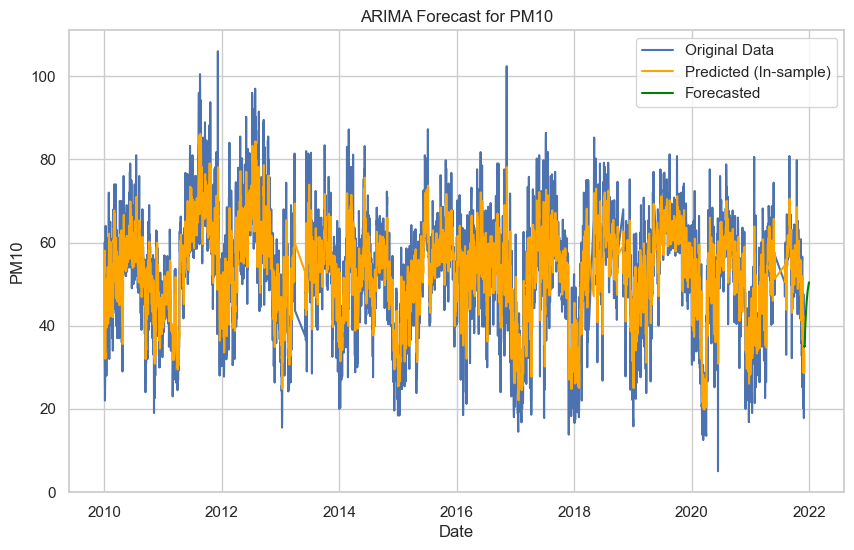

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load your PM10 data
# Assuming df_pm10 is your pandas DataFrame with the 'pm10' column

# Fit an ARIMA model
p, d, q = 5, 0, 0
model = sm.tsa.ARIMA(df_pm10['pm10'], order=(p, d, q))
model_fit = model.fit()

# Forecast future values
forecast_steps = 30  # Forecast 30 steps into the future
forecast = model_fit.forecast(steps=forecast_steps)

# Adding predicted and forecasted values to the DataFrame
in_sample_preds = model_fit.fittedvalues
forecast_index = pd.date_range(start=df_pm10['tanggal'].iloc[-1],periods=forecast_steps+1, closed='right')

# Create a DataFrame for predicted and forecasted values
predictions_df = pd.DataFrame({'tanggal': df_pm10['tanggal'], 'pm10_original': df_pm10['pm10'],
                               'pm10_predicted': in_sample_preds})
forecast_df = pd.DataFrame({'tanggal': forecast_index, 'pm10_forecast': forecast})

# Concatenate the DataFrames
combined_df = pd.concat([df_pm10, predictions_df, forecast_df], axis=0)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(combined_df['tanggal'], combined_df['pm10_original'], label='Original Data')
plt.plot(combined_df['tanggal'], combined_df['pm10_predicted'], label='Predicted (In-sample)', color='orange')
plt.plot(combined_df['tanggal'], combined_df['pm10_forecast'], label='Forecasted', color='green')
plt.title('ARIMA Forecast for PM10')
plt.xlabel('Date')
plt.ylabel('PM10')
plt.legend()
plt.show()


In [150]:
combined_df

,tanggal,pm10,pm10_original,pm10_predicted,pm10_forecast
0,2010-01-01,60.0,NaN,NaN,NaN
1,2010-01-02,32.0,NaN,NaN,NaN
2,2010-01-03,27.0,NaN,NaN,NaN
3,2010-01-04,22.0,NaN,NaN,NaN
4,2010-01-05,25.0,NaN,NaN,NaN
...,...,...,...,...,...
4158,2021-12-26,NaN,NaN,NaN,49.602474
4159,2021-12-27,NaN,NaN,NaN,49.830286
4160,2021-12-28,NaN,NaN,NaN,50.042118
4161,2021-12-29,NaN,NaN,NaN,50.239092


In [151]:
#filter where pm10_pred is not null
df_pred = combined_df[combined_df['pm10_forecast'].notnull()]
df_pred


,tanggal,pm10,pm10_original,pm10_predicted,pm10_forecast
4133,2021-12-01,NaN,NaN,NaN,34.909224
4134,2021-12-02,NaN,NaN,NaN,35.195682
4135,2021-12-03,NaN,NaN,NaN,35.024360
4136,2021-12-04,NaN,NaN,NaN,36.089788
4137,2021-12-05,NaN,NaN,NaN,37.909177
...,...,...,...,...,...
4158,2021-12-26,NaN,NaN,NaN,49.602474
4159,2021-12-27,NaN,NaN,NaN,49.830286
4160,2021-12-28,NaN,NaN,NaN,50.042118
4161,2021-12-29,NaN,NaN,NaN,50.239092


In [152]:
from IPython.display import display

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from time import time
import seaborn as sns
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

RANDOM_SEED = np.random.seed(0)

In [154]:
arima = sm.tsa.ARIMA(df_pm10['pm10'], order=(12,1,1))
predictions = arima.fit().predict()

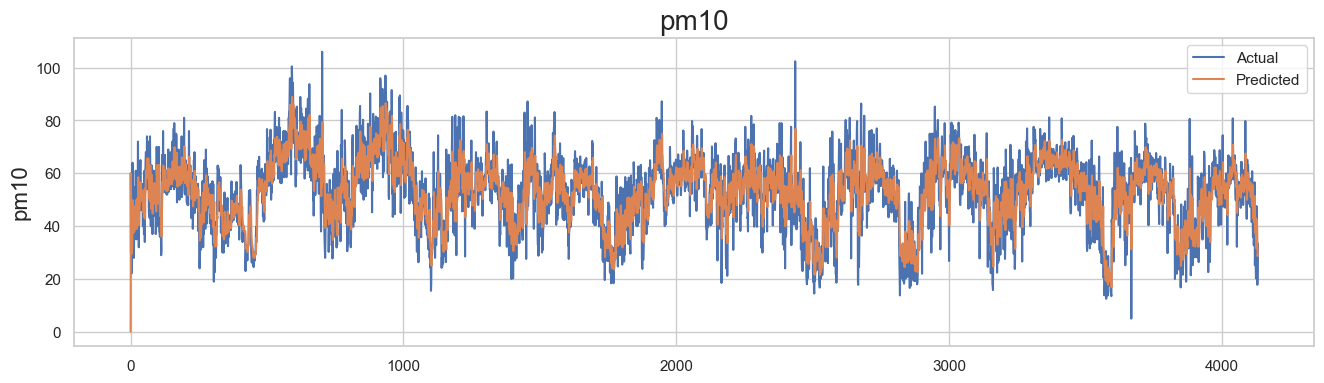

In [157]:
plt.figure(figsize=(16,4))
plt.plot(df_pm10['pm10'], label="Actual")
plt.plot(predictions, label="Predicted")
plt.title('pm10', fontsize=20)
plt.ylabel('pm10', fontsize=16)
plt.legend()

In [158]:
sarima = SARIMAX(df_pm10['pm10'],
                order=(1,1,1),
                seasonal_order=(1,1,0,12))
predictions = sarima.fit().predict()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.86442D+00    |proj g|=  4.79125D-02


 This problem is unconstrained.



At iterate    5    f=  3.82625D+00    |proj g|=  5.20002D-02

At iterate   10    f=  3.82215D+00    |proj g|=  1.03124D-03

At iterate   15    f=  3.82128D+00    |proj g|=  1.99633D-02

At iterate   20    f=  3.81886D+00    |proj g|=  1.42170D-02

At iterate   25    f=  3.81796D+00    |proj g|=  1.45273D-03

At iterate   30    f=  3.81790D+00    |proj g|=  9.24766D-05

At iterate   35    f=  3.81790D+00    |proj g|=  1.19680D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     38     40      1     0     0   8.797D-06   3.818D+00
  F =   3.8178953964023536     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

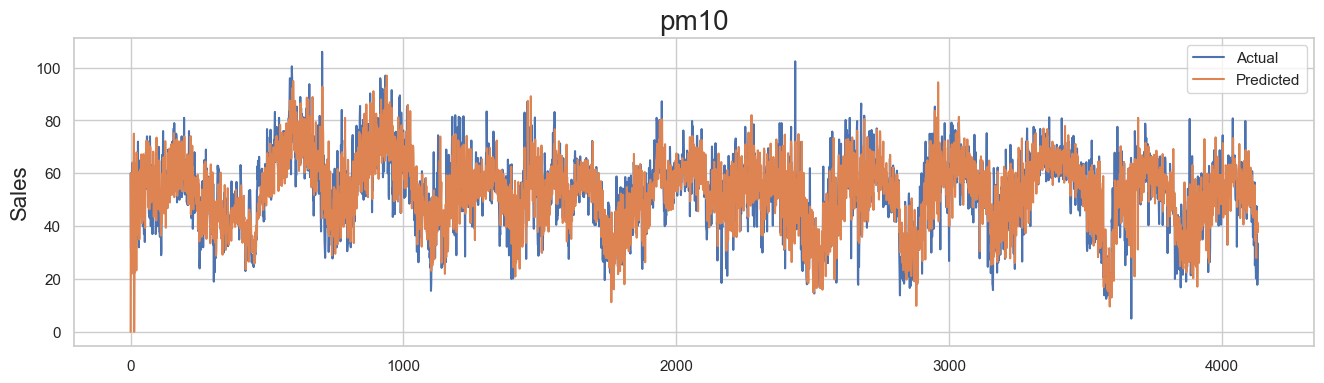

In [180]:
plt.figure(figsize=(16,4))
plt.plot(df_pm10['pm10'], label="Actual")
plt.plot(predictions, label="Predicted")
plt.title('pm10', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.legend()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.86442D+00    |proj g|=  4.79125D-02


 This problem is unconstrained.



At iterate    5    f=  3.82625D+00    |proj g|=  5.20002D-02

At iterate   10    f=  3.82215D+00    |proj g|=  1.03124D-03

At iterate   15    f=  3.82128D+00    |proj g|=  1.99633D-02

At iterate   20    f=  3.81886D+00    |proj g|=  1.42170D-02

At iterate   25    f=  3.81796D+00    |proj g|=  1.45273D-03

At iterate   30    f=  3.81790D+00    |proj g|=  9.24766D-05

At iterate   35    f=  3.81790D+00    |proj g|=  1.19680D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     38     40      1     0     0   8.797D-06   3.818D+00
  F =   3.8178953964023536     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

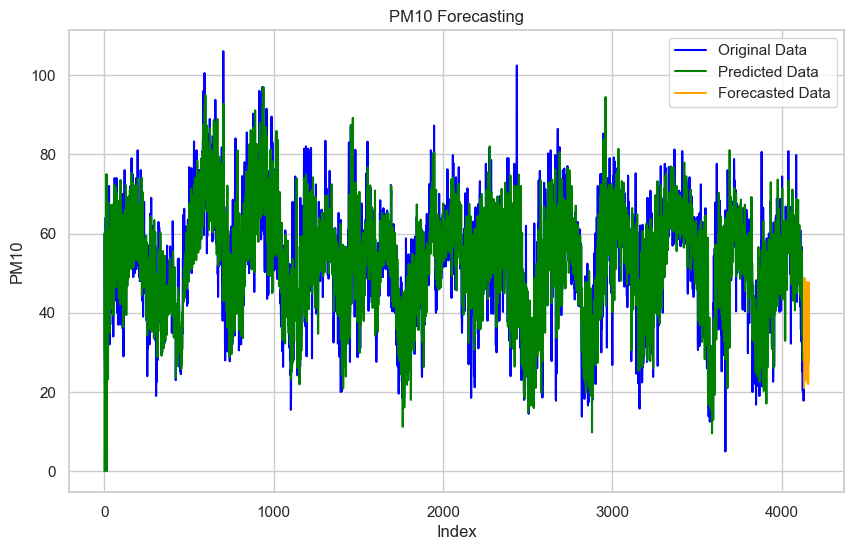

In [176]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming df_pm10 is your DataFrame containing historical data

# Train the SARIMAX model
sarima = SARIMAX(df_pm10['pm10'],
                order=(1, 1, 1),
                seasonal_order=(1, 1, 0, 12))
sarima_fit = sarima.fit()

# Get the predictions from the trained model
predictions = sarima_fit.predict()

# Forecast the next 30 days based on the predictions
forecast_steps = 30
forecast_values = sarima_fit.get_forecast(steps=forecast_steps).predicted_mean

# Create a DataFrame for the forecasted data (only index, no date)
forecast_df = pd.DataFrame({
    'Forecasted_PM10': forecast_values
})

# Display the forecast DataFrame
print("Forecasted Data:")
print(forecast_df)

# Plot the original data, predicted data, and forecasted data in one plot
plt.figure(figsize=(10, 6))
plt.plot(df_pm10['pm10'], label='Original Data', color='blue')
plt.plot(predictions, label='Predicted Data', color='green')
plt.plot(list(range(len(df_pm10), len(df_pm10) + len(forecast_values))), forecast_values, label='Forecasted Data', color='orange')
plt.title('PM10 Forecasting')
plt.xlabel('Index')
plt.ylabel('PM10')
plt.legend()
plt.show()


In [178]:
df_pm10.tail()

,tanggal,pm10
4128,2021-11-26,44.6
4129,2021-11-27,30.8
4130,2021-11-28,17.8
4131,2021-11-29,23.6
4132,2021-11-30,33.4


In [177]:
forecast_df

,Forecasted_PM10
4133,21.016001
4134,29.079584
4135,48.821144
4136,32.507118
4137,29.849575
...,...
4158,29.149560
4159,47.707953
4160,30.623768
4161,27.381501


<Axes: >

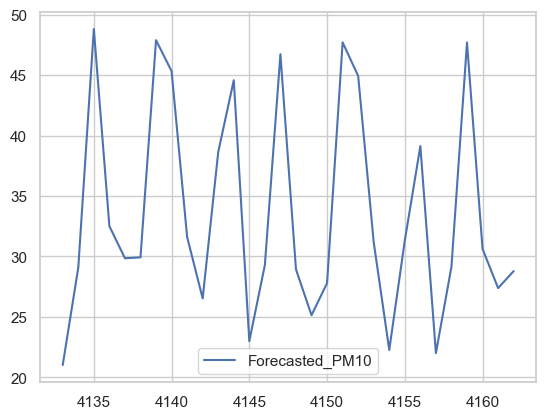

In [183]:
#plot forecast_df with orange color
forecast_df.plot()

